In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import *
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE,ADASYN
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
%matplotlib inline
import tensorflow as tf
from tensorflow_addons import losses
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.feature_selection import RFECV
warnings.simplefilter('ignore')


In [2]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-']
df = pd.read_csv('C:\\Users\\nafiu\\OneDrive\\Desktop\\Article on Sub-saharan\\Data\\lt.csv', na_values = missing_values)


In [3]:
df.head()

,Mother's Age,Residence,Education level,Wealth Index,Breastfeed,Anemia Level,Husband's education level,Working status,Birth order,Sex of child,...,Diarrhea,Fever,Vitamin A,Child's Age,Child's Anemia,SODW,TOTF,Media exposure,Mother BMI,Combined
0,4,2,0,3,1,1,0,1,4,2,...,0,0,1,1,1,0,0,0,1,0
1,4,2,0,3,1,1,0,1,4,2,...,0,0,1,3,1,0,0,0,1,1
2,5,2,0,3,1,1,0,1,4,2,...,0,0,1,1,1,0,0,0,1,0
3,5,2,0,3,1,1,0,1,4,2,...,0,0,1,3,0,0,0,0,1,1
4,4,2,0,3,1,0,0,1,4,2,...,0,0,1,1,1,0,0,0,3,0


In [4]:
df.isnull().sum()

Mother's Age                 0
Residence                    0
Education level              0
Wealth Index                 0
Breastfeed                   0
Anemia Level                 0
Husband's education level    0
Working status               0
Birth order                  0
Sex of child                 0
Size of child                0
Diarrhea                     0
Fever                        0
Vitamin A                    0
Child's Age                  0
Child's Anemia               0
SODW                         0
TOTF                         0
Media exposure               0
Mother BMI                   0
Combined                     0
dtype: int64

In [5]:
df.Combined.value_counts()

1    34158
0    22085
Name: Combined, dtype: int64

In [6]:
## data balancing
#spliting the testing and training data 


df_test=df[34000:]
df_train=df[:34000]


X_test = df_test.drop('Combined', axis=1)
Y_test = df_test['Combined']

In [7]:
##resampling
# Separate majority and minority classes

df_minority = df_train[df_train.Combined==0]
df_majority = df_train[df_train.Combined==1]

In [8]:
df_majority.shape,df_minority.shape

((20797, 21), (13203, 21))

In [9]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=20797,    # to match majority class
                                 random_state=123)

In [10]:
df_minority_upsampled

,Mother's Age,Residence,Education level,Wealth Index,Breastfeed,Anemia Level,Husband's education level,Working status,Birth order,Sex of child,...,Diarrhea,Fever,Vitamin A,Child's Age,Child's Anemia,SODW,TOTF,Media exposure,Mother BMI,Combined
7788,3,2,0,1,0,0,0,1,2,1,...,0,1,1,3,1,1,0,0,1,0
29526,4,2,0,2,1,1,0,0,4,2,...,0,1,0,2,1,0,0,0,3,0
3345,3,1,0,4,0,1,1,0,3,1,...,0,1,1,2,1,1,1,0,1,0
31073,3,2,1,3,0,1,2,0,3,1,...,0,1,0,1,1,1,0,0,3,0
10504,7,2,0,1,0,0,1,1,4,2,...,0,1,1,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,3,2,0,1,1,1,0,1,4,1,...,0,0,0,1,1,1,0,1,1,0
7570,4,2,0,2,0,1,0,1,4,1,...,1,0,0,2,1,1,1,0,2,0
12431,4,1,2,4,1,1,2,1,4,1,...,1,1,1,1,1,1,0,1,2,0
9004,4,2,0,3,0,0,0,1,4,2,...,0,1,0,3,1,0,0,0,1,0


In [11]:
##upsampled
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [12]:
df_upsampled

,Mother's Age,Residence,Education level,Wealth Index,Breastfeed,Anemia Level,Husband's education level,Working status,Birth order,Sex of child,...,Diarrhea,Fever,Vitamin A,Child's Age,Child's Anemia,SODW,TOTF,Media exposure,Mother BMI,Combined
1,4,2,0,3,1,1,0,1,4,2,...,0,0,1,3,1,0,0,0,1,1
3,5,2,0,3,1,1,0,1,4,2,...,0,0,1,3,0,0,0,0,1,1
6,3,2,0,3,1,1,0,1,4,2,...,0,0,1,1,1,0,0,0,1,1
9,5,2,0,2,0,1,0,1,4,1,...,0,0,1,2,1,0,0,0,1,1
12,2,2,0,3,1,1,0,1,1,1,...,1,1,0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,3,2,0,1,1,1,0,1,4,1,...,0,0,0,1,1,1,0,1,1,0
7570,4,2,0,2,0,1,0,1,4,1,...,1,0,0,2,1,1,1,0,2,0
12431,4,1,2,4,1,1,2,1,4,1,...,1,1,1,1,1,1,0,1,2,0
9004,4,2,0,3,0,0,0,1,4,2,...,0,1,0,3,1,0,0,0,1,0


In [13]:
X = df_upsampled.drop('Combined', axis=1)
y = df_upsampled['Combined']
y.value_counts()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y)

In [19]:
##KNN
params = {'n_neighbors':[15,20,25,30,50],  'weights':['uniform', 'distance'],'p':[1,2]}
knn = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn, param_grid=params, cv=10) 
knn_grid_cv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",knn_grid_cv.best_params_)
## parameter tuning

Best Hyper Parameters:
 {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=25, p=1, weights='distance')
knn.fit(X_train, y_train)
y_hat_knn = knn.predict(X_test)
print('Accuracy:',accuracy_score(y_test, y_hat_knn))

Accuracy: 0.7413150619064791


In [15]:
cm_knn= confusion_matrix(y_test, y_hat_knn)
sn=cm_knn[0,0]/(cm_knn[0,0]+cm_knn[0,1])
print('Sensitivity:', sn)
sp=cm_knn[1,1]/(cm_knn[1,0]+cm_knn[1,1])
print('Specificity:', sp)


Sensitivity: 0.8901442307692308
Specificity: 0.5924501081990863


In [16]:
print('AUC:', roc_auc_score(y_test, y_hat_knn))
print('MCC:', matthews_corrcoef(y_test, y_hat_knn))
print('MSE:', mean_squared_error(y_test,y_hat_knn))
print('KAPPA:', cohen_kappa_score(y_test, y_hat_knn))
print('Log Loss:', log_loss(y_test,y_hat_knn))

AUC: 0.7412971694841585
MCC: 0.5055232448908166
MSE: 0.25868493809352083
KAPPA: 0.48261160554172544
Log Loss: 8.93470515901832


In [17]:
y_hat_knn = knn.predict(X_test)
print(classification_report(y_test, y_hat_knn))
print('Accuracy:',accuracy_score(y_test, y_hat_knn))

              precision    recall  f1-score   support

           0       0.69      0.89      0.77      4160
           1       0.84      0.59      0.70      4159

    accuracy                           0.74      8319
   macro avg       0.76      0.74      0.74      8319
weighted avg       0.76      0.74      0.74      8319

Accuracy: 0.7413150619064791


In [18]:
cv= cross_val_score(knn, X_train, y_train, cv=10)
print("Cross validation accuracy of KNN model=",cv)
print("\ncross validation mean accuracy of model=", cv.mean())


Cross validation accuracy of KNN model= [0.73467548 0.73257212 0.73257212 0.71484375 0.73106971 0.72167118
 0.72016832 0.72888488 0.72497746 0.73519687]

cross validation mean accuracy of model= 0.7276631880621258


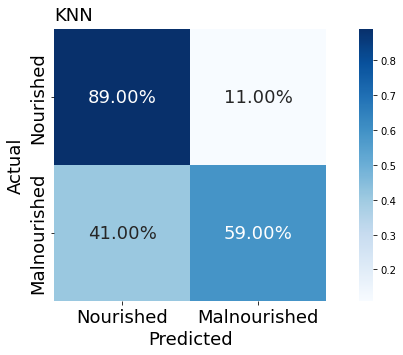

In [38]:
plt.figure(figsize=(12,5))
cm_knn_normalized=np.round(cm_knn/np.sum(cm_knn,axis=1).reshape(-1,1),2)
cm_knn_plot=sns.heatmap(cm_knn_normalized, annot=True,fmt='.2%', cmap='Blues',
            annot_kws={'fontsize':18},
           xticklabels=['Nourished', 'Malnourished'],
           yticklabels=['Nourished', 'Malnourished'],
           square=True)
cm_knn_plot.set_xticklabels(cm_knn_plot.get_xticklabels(), fontsize=18)
cm_knn_plot.set_yticklabels(cm_knn_plot.get_yticklabels(), fontsize=18)
plt.title("KNN", fontsize=18,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.show()

In [25]:
##RF
params = { 
    'n_estimators': [10, 50, 100, 150, 200, 300, 400, 500],
    'max_depth' : [10,20,30,40,50],
    'criterion' : ['entropy','gini'] }
rfc_gridcv = RandomForestClassifier(random_state=42)
rfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, verbose= 3, n_jobs = -1) 
rfc_gridcv.fit(X_train, y_train) ## parameter tuning
print("Best Hyper Parameters:\n",rfc_gridcv.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyper Parameters:
 {'criterion': 'gini', 'max_depth': 40, 'n_estimators': 150}


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=90)

rfc = RandomForestClassifier(n_estimators=150,max_depth= 40, criterion = 'gini')
rfc.fit(X_train, y_train)
y_hat_rfc = rfc.predict(X_test)
print('Accuracy:',accuracy_score(y_test, y_hat_rfc))

Accuracy: 0.7997355451376368


In [19]:
## Sensitivity/ Specificity
cm_rfc= confusion_matrix(y_test, y_hat_rfc)
sn_rfc=cm_rfc[0,0]/(cm_rfc[0,0]+cm_rfc[0,1])
print('Sensitivity:', sn_rfc)
sp_rfc=cm_rfc[1,1]/(cm_rfc[1,0]+cm_rfc[1,1])
print('Specificity:', sp_rfc)


Sensitivity: 0.8254388074056264
Specificity: 0.7740384615384616


In [20]:
print('AUC:', roc_auc_score(y_test, y_hat_rfc))
print('MCC:', matthews_corrcoef(y_test,y_hat_rfc))
print('MSE:', mean_squared_error(y_test,y_hat_rfc))
print('KAPPA:', cohen_kappa_score(y_test, y_hat_rfc))
print('Log Loss:', log_loss(y_test,y_hat_rfc))

AUC: 0.799738634472044
MCC: 0.6002685176729681
MSE: 0.20026445486236327
KAPPA: 0.59947356152603
Log Loss: 6.9169590072912035


In [23]:
## 10 Fold
cv= cross_val_score(rfc, X_train, y_train, cv=10)
print("Cross validation accuracy of KNN model=",cv)
print("\ncross validation mean accuracy of model=",format(cv.mean(),".2f"))


Cross validation accuracy of KNN model= [0.77734375 0.79417067 0.79236779 0.79176683 0.78064904 0.78238653
 0.7889991  0.78629396 0.78960024 0.79380824]

cross validation mean accuracy of model= 0.79


In [21]:
## Classification Report
y_hat_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_hat_rfc))
print('Accuracy:',accuracy_score(y_test, y_hat_rfc))

              precision    recall  f1-score   support

           0       0.79      0.83      0.80      4159
           1       0.82      0.77      0.79      4160

    accuracy                           0.80      8319
   macro avg       0.80      0.80      0.80      8319
weighted avg       0.80      0.80      0.80      8319

Accuracy: 0.7997355451376368


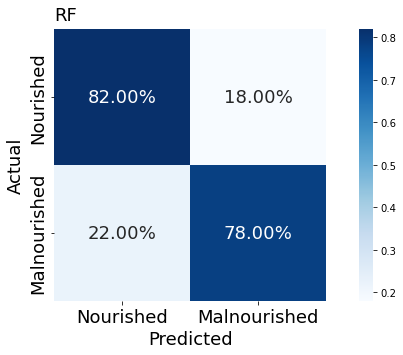

In [43]:
## Confusion matrix
plt.figure(figsize=(12,5))
cm_rfc_normalized=np.round(cm_rfc/np.sum(cm_rfc,axis=1).reshape(-1,1),2)
cm_rfc_plot=sns.heatmap(cm_rfc_normalized, annot=True,fmt='.2%', cmap='Blues',
            annot_kws={'fontsize':18},
           xticklabels=['Nourished', 'Malnourished'],
           yticklabels=['Nourished', 'Malnourished'],
           square=True)
cm_rfc_plot.set_xticklabels(cm_rfc_plot.get_xticklabels(), fontsize=18)
cm_rfc_plot.set_yticklabels(cm_rfc_plot.get_yticklabels(), fontsize=18)

plt.title("RF", fontsize=18,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.show()

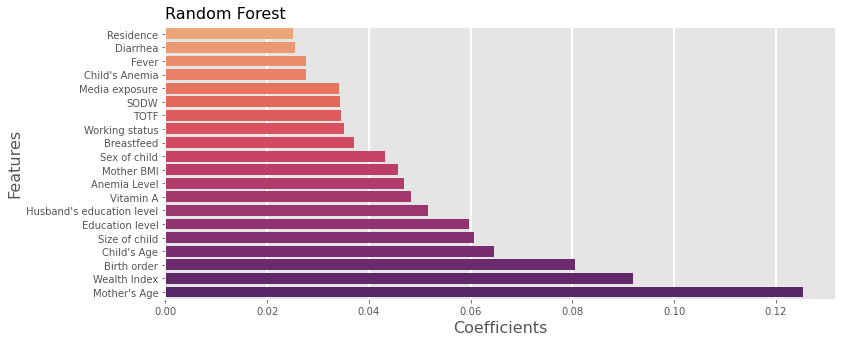

In [35]:
## Feature Important
from matplotlib import style
feature_imp = pd.DataFrame(sorted(zip(rfc.feature_importances_,X.columns)), columns=['Feature Importance Value','Features'])
feature_imp_s=feature_imp.sort_values(by="Feature Importance Value", ascending=True)
plt.figure(figsize=(12,5))
style.use("ggplot")
plt.grid(linestyle='-',linewidth=2)
rfc_fi_plot= sns.barplot(x="Feature Importance Value", y="Features" ,saturation=1,
            data=feature_imp_s[0:40], palette='flare')
plt.title("Random Forest", fontsize=16,  y=1.01, loc='left')
plt.xlabel("Coefficients", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.show() 

In [31]:
##Decision Tree Model
params_dt = {
    'criterion':['gini','entropy'],
  'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18], }
dt = DecisionTreeClassifier()
dt_grid_cv = GridSearchCV(dt, param_grid=params_dt, cv=10) 
dt_grid_cv.fit(X_train, y_train) ## Parameter Tuning
print("Best Hyper Parameters:\n",dt_grid_cv.best_params_)

Best Hyper Parameters:
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 0.14}


In [36]:
##Model Building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=90)
dt = DecisionTreeClassifier(criterion= 'gini',max_depth=2,min_samples_leaf=0.14 )
dt.fit(X_train, y_train)
y_hat_dt = dt.predict(X_test)
print('Accuracy:',accuracy_score(y_test, y_hat_dt))

Accuracy: 0.6005529510758505


In [37]:
## Sensitivity/ Specificity
cm_dt= confusion_matrix(y_test, y_hat_dt)
sn_dt=cm_dt[0,0]/(cm_dt[0,0]+cm_dt[0,1])
print('Sensitivity:', sn_dt)
sp_dt=cm_dt[1,1]/(cm_dt[1,0]+cm_dt[1,1])
print('Specificity:', sp_dt)

Sensitivity: 0.6427025727338302
Specificity: 0.5584134615384615


In [38]:
## Model Performance 
print('AUC:', roc_auc_score(y_test, y_hat_dt))
print('MCC:', matthews_corrcoef(y_test,y_hat_dt))
print('MSE:', mean_squared_error(y_test,y_hat_dt))
print('KAPPA:', cohen_kappa_score(y_test, y_hat_dt))
print('Log Loss:', log_loss(y_test,y_hat_dt))

AUC: 0.6005580171361459
MCC: 0.20183387810593273
MSE: 0.39944704892414956
KAPPA: 0.20111399423943965
Log Loss: 13.796555134279295


In [48]:
## Classification Report
y_hat_dt = dt.predict(X_test)
print(classification_report(y_test, y_hat_dt))
print('Accuracy:',accuracy_score(y_test, y_hat_dt))

              precision    recall  f1-score   support

           0       0.59      0.64      0.62      4159
           1       0.61      0.56      0.58      4160

    accuracy                           0.60      8319
   macro avg       0.60      0.60      0.60      8319
weighted avg       0.60      0.60      0.60      8319

Accuracy: 0.6005529510758505


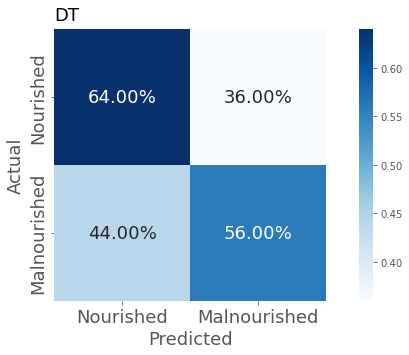

In [39]:
## Confusion matrix
cm_dt= confusion_matrix(y_test, y_hat_dt)
plt.figure(figsize=(12,5))
cm_dt_normalized=np.round(cm_dt/np.sum(cm_dt,axis=1).reshape(-1,1),2)
cm_dt_plot=sns.heatmap(cm_dt_normalized, annot=True,fmt='.2%', cmap='Blues',
            annot_kws={'fontsize':18},
            xticklabels=['Nourished', 'Malnourished'],
            yticklabels=['Nourished', 'Malnourished'],
           square=True)
cm_dt_plot.set_xticklabels(cm_dt_plot.get_xticklabels(), fontsize=18)
cm_dt_plot.set_yticklabels(cm_dt_plot.get_yticklabels(), fontsize=18)
plt.title("DT", fontsize=18,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.show()

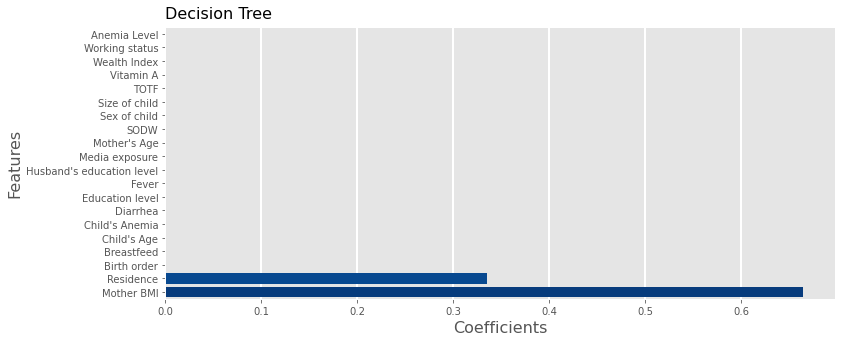

In [41]:
## Feature Important
from matplotlib import style
feature_imp = pd.DataFrame(sorted(zip(dt.feature_importances_,X.columns)), columns=['Feature Importance Value','Features'])
feature_imp_s=feature_imp.sort_values(by="Feature Importance Value", ascending=True)
plt.figure(figsize=(12,5))
style.use("ggplot")
plt.grid(linestyle='-',linewidth=2)
rfc_fi_plot= sns.barplot(x="Feature Importance Value", y="Features" ,saturation=1,
            data=feature_imp_s[0:40], palette='Blues')
plt.title("Decision Tree", fontsize=16,  y=1.01, loc='left')
plt.xlabel("Coefficients", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.show() 

In [41]:
##XGBoost Model
params_xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
xgb_classifier = XGBClassifier()
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params_xgb, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train, y_train) ## Parameter Tuning
print("Best Hyper Parameters:\n",random_search.best_params_)
random_search.best_estimator_



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[02:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Hyper Parameters:
 {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.7}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [42]:
xgb_classifier_pt= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [43]:
## Model Building and Classification Report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=90)
xgb_classifier_pt.fit(X_train, y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(X_test)
print(classification_report(y_test,y_pred_xgb_pt))
print('Accuracy:',accuracy_score(y_test, y_pred_xgb_pt))

[23:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      4159
           1       0.81      0.75      0.78      4160

    accuracy                           0.79      8319
   macro avg       0.79      0.79      0.79      8319
weighted avg       0.79      0.79      0.79      8319

Accuracy: 0.7861521817526145


In [44]:
## Sensitivity/ Specificity
cm_xgb= confusion_matrix(y_test, y_pred_xgb_pt)
sn_xgb=cm_xgb[0,0]/(cm_xgb[0,0]+cm_xgb[0,1])
print('Sensitivity:', sn_xgb)
sp_xgb=cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1])
print('Specificity:', sp_xgb)


Sensitivity: 0.8239961529213753
Specificity: 0.7483173076923076


In [45]:
## Model Performance
print('AUC:', roc_auc_score(y_test, y_pred_xgb_pt))
print('MCC:', matthews_corrcoef(y_test, y_pred_xgb_pt))
print('MSE:', mean_squared_error(y_test, y_pred_xgb_pt))
print('KAPPA:', cohen_kappa_score(y_test, y_pred_xgb_pt))
print('Log Loss:', log_loss(y_test, y_pred_xgb_pt))

AUC: 0.7861567303068415
MCC: 0.5739564278953432
MSE: 0.2138478182473855
KAPPA: 0.5723082507265587
Log Loss: 7.386112334639381


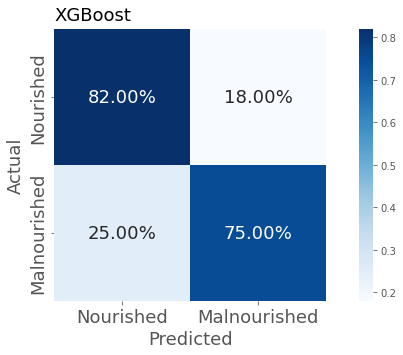

In [54]:
## Confusion matrix
plt.figure(figsize=(12,5))
cm_xgb_normalized=np.round(cm_xgb/np.sum(cm_xgb,axis=1).reshape(-1,1),2)
cm_xgb_plot=sns.heatmap(cm_xgb_normalized, annot=True,fmt='.2%', cmap='Blues',
            annot_kws={'fontsize':18},
            xticklabels=['Nourished', 'Malnourished'],
            yticklabels=['Nourished', 'Malnourished'],
           square=True)
cm_xgb_plot.set_xticklabels(cm_xgb_plot.get_xticklabels(), fontsize=18)
cm_xgb_plot.set_yticklabels(cm_xgb_plot.get_yticklabels(), fontsize=18)
plt.title("XGBoost", fontsize=18,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.show()

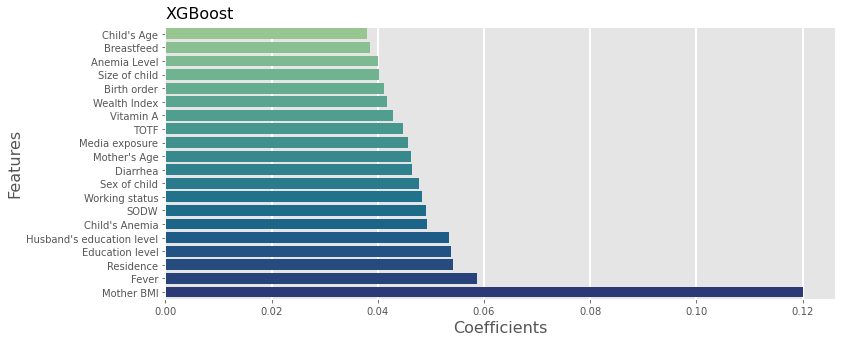

In [46]:
## Feature Important
from matplotlib import style
feature_imp = pd.DataFrame(sorted(zip(xgb_classifier_pt.feature_importances_,X.columns)), columns=['Feature Importance Value','Features'])
feature_imp_s=feature_imp.sort_values(by="Feature Importance Value", ascending=True)
plt.figure(figsize=(12,5))
style.use("ggplot")
plt.grid(linestyle='-',linewidth=2)
xgb_fi_plot= sns.barplot(x="Feature Importance Value", y="Features" ,saturation=1, data=feature_imp_s[0:40], palette='crest')
plt.title("XGBoost", fontsize=16, y=1.01, loc='left')
plt.xlabel("Coefficients", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.show()

In [56]:
##Hybrid Model (Voting)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.2,stratify=y, random_state=32)
clfs2 =[rfc,dt,knn,xgb_classifier_pt]
model_clfs2= EnsembleVoteClassifier(
      clfs=clfs2,
      voting="hard",
      weights=[1,1,1,1],
      fit_base_estimators= False).fit(X_train, y_train)
pred_clfs2=model_clfs2.predict(X_test)
print("Voting 2 accuracy score:", accuracy_score(y_test, pred_clfs2))


Voting 2 accuracy score: 0.9371318668109148


In [57]:
cm_voting2 = confusion_matrix(y_test, pred_clfs2)
sn_voting2=cm_voting2[0,0]/(cm_voting2[0,0]+cm_voting2[0,1])
print('Sensitivity:', sn_voting2)
sp_voting2=cm_voting2[1,1]/(cm_voting2[1,0]+cm_voting2[1,1])
print('Specificity:', sp_voting2)
print(classification_report(y_test,pred_clfs2))

Sensitivity: 0.982447703774946
Specificity: 0.8918269230769231
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4159
           1       0.98      0.89      0.93      4160

    accuracy                           0.94      8319
   macro avg       0.94      0.94      0.94      8319
weighted avg       0.94      0.94      0.94      8319



In [58]:
## Model Performance
print('AUC:', roc_auc_score(y_test, pred_clfs2))
print('MCC:', matthews_corrcoef(y_test, pred_clfs2))
print('MSE:', mean_squared_error(y_test, pred_clfs2))
print('KAPPA:', cohen_kappa_score(y_test, pred_clfs2))
print('Log Loss:', log_loss(y_test, pred_clfs2))

AUC: 0.9371373134259345
MCC: 0.8778782847202048
MSE: 0.06286813318908523
KAPPA: 0.874265101692595
Log Loss: 2.1713954111252187


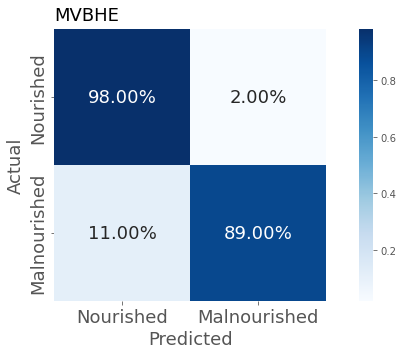

In [59]:
## Confusion matrix
plt.figure(figsize=(12,5))
MV_normalized=np.round(cm_voting2/np.sum(cm_voting2,axis=1).reshape(-1,1),2)
cm_MV_plot=sns.heatmap(MV_normalized, annot=True,fmt='.2%', cmap='Blues',
            annot_kws={'fontsize':18},
            xticklabels=['Nourished', 'Malnourished'],
            yticklabels=['Nourished', 'Malnourished'],
           square=True)
cm_MV_plot.set_xticklabels(cm_MV_plot.get_xticklabels(), fontsize=18)
cm_MV_plot.set_yticklabels(cm_MV_plot.get_yticklabels(), fontsize=18)
plt.title("MVBHE", fontsize=18,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.show()

In [61]:
## ROC Curve
##KNN
y_knn = knn.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_knn)
roc_auc1 = metrics.auc(fpr1, tpr1)

## RF
y_rfc = rfc.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_rfc)
roc_auc2 = metrics.auc(fpr2, tpr2)

## DT
y_dt = dt.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_dt)
roc_auc3 = metrics.auc(fpr3, tpr3)


## XGBoost
y_xgb_pt = xgb_classifier_pt.predict_proba(X_test)[:,1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_xgb_pt)
roc_auc4 = metrics.auc(fpr4, tpr4)

#MVBHE
y_mvbhe = model_clfs2.predict_proba(X_test)[:,1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_mvbhe)
roc_auc5 = metrics.auc(fpr5, tpr5)

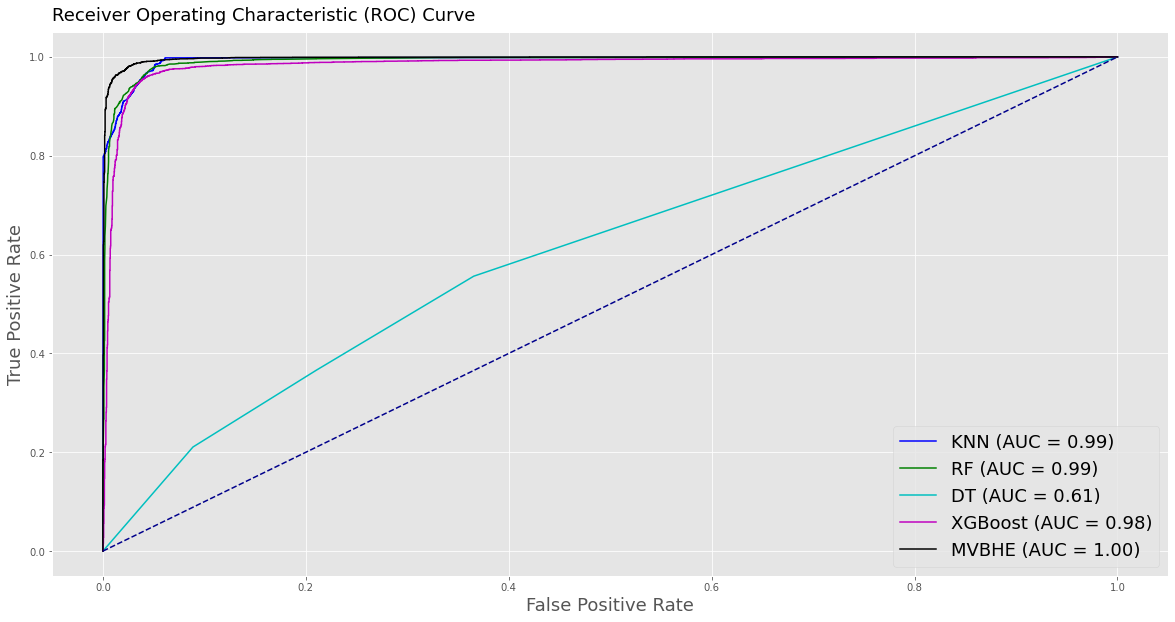

In [62]:
## Plotting Curve
plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1, color='b', linestyle='-',label='KNN (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', linestyle='-',label='RF (AUC = %0.2f)' % roc_auc2) 
plt.plot(fpr3, tpr3, color='c', linestyle='-',label='DT (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='m', linestyle='solid',label='XGBoost (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='k', linestyle='-',label='MVBHE (AUC = %0.2f)' % roc_auc5)


plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate',fontsize= 18)
plt.ylabel('True Positive Rate',fontsize= 18)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize= 18, y=1.01, 
          loc='left')

plt.legend(fontsize= 18)
plt.show()

In [47]:
## Feature Important
from matplotlib import style
feature_imp = pd.DataFrame(sorted(zip(model_clfs2.feature_importances_,X.columns)), columns=['Feature Importance Value','Features'])
feature_imp_s=feature_imp.sort_values(by="Feature Importance Value", ascending=True)
plt.figure(figsize=(12,5))
style.use("ggplot")
plt.grid(linestyle='-',linewidth=2)
xgb_fi_plot= sns.barplot(x="Feature Importance Value", y="Features" ,saturation=1, data=feature_imp_s[0:40], palette='cool')
plt.title("MVBHE", fontsize=16, y=1.01, loc='left')
plt.xlabel("Coefficients", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.show()

NameError: name 'clfs2' is not defined

In [4]:
from platform import python_version
python_version()

'3.9.7'

In [5]:
pip show  scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\nafiu\anaconda3\lib\site-packages
Requires: numpy, joblib, scipy, threadpoolctl
Required-by: scikit-learn-intelex, mlxtend, lightgbm, imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show Keras

Name: keras
Version: 2.9.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\users\nafiu\anaconda3\lib\site-packages
Requires: 
Required-by: tensorflow
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip show tensorflow 

Name: tensorflow
Version: 2.9.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\nafiu\anaconda3\lib\site-packages
Requires: six, typing-extensions, tensorflow-io-gcs-filesystem, libclang, setuptools, gast, keras, keras-preprocessing, tensorflow-estimator, absl-py, wrapt, h5py, protobuf, tensorboard, flatbuffers, opt-einsum, termcolor, astunparse, google-pasta, grpcio, packaging, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip show mljar-supervised

Note: you may need to restart the kernel to use updated packages.
